<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

 </center></font></h1>
<h2><font color='0B5345'> <center>
Bioseñales y Sistemas</center></font></h2>
<font  face="Courier New" size="3">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Práctica 6: Diseño de filtros digitales </center></font></h2><font  face="Courier New" size="2">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Isabella Vásquez García </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
C.C. 1000.438.341 </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Marie Anne Johanna Bernal Diaz </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
C.C. 1003.894.043 </center></font></h2>
<font  face="Courier New" size="1">

In [2]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.signal import welch, firwin, filtfilt
from scipy import signal


## **4.1 Creación de la señal**

**Genere las secuencias ficticias Xe (n) y Ye (n), implemente w(n)  como una secuencia de ruido Gaussiano con media cero y varianza σ^2=0,01, establezca α=0,8 y un retraso D=15 muestras. Grafique ambas señales.**


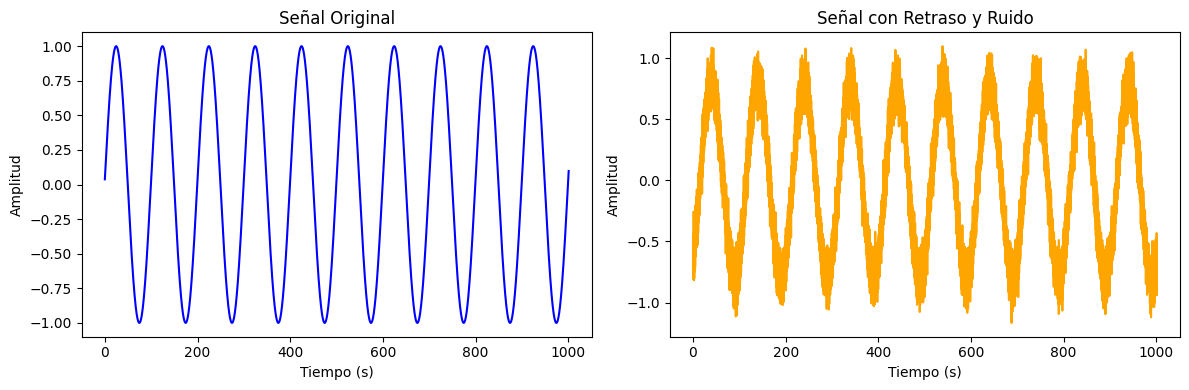

In [3]:
# Creando la señal Xe(n)
Fo = 0.01 # Frecuencia fundamental de la señal Xe(n)
Fs = 25 # Frecuencia de muestreo
n = np.arange(0,1001, 1/Fs) # Vector de la variabe independiente
Xe = np.sin(2*(np.pi)*Fo*(n+15/Fs)) # Señal biológica original

# Creando la señal Ye(n) (retraso y atenuación de Xe)
alpha = 0.8 # Atenuación dado por el viaje de la señal Xe a través de diversos tejidos
D = 15 # Retard0 induciodo por el viaje de la señal Xe a través de diversos tejidos
# Para el ruido Gaussiano
media = 0;
varianza = 0.01
std = np.sqrt(varianza)
w = np.random.normal(loc=media, scale=std, size=len(n))
# Obteniendo la señal final de la forma: y_e (n)=α*Xe(n-D)+w(n)

Xe_Retardo = np.sin(2*(np.pi)*Fo*(n-D)) # Señal Xe retrasada en D muestras
Ye = alpha*Xe_Retardo + w

# Graficando las señales Xe(n, Ye(n) y el W
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(n, Xe, color="blue")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Señal Original")

plt.subplot(1, 2, 2)
plt.plot(n, Ye, color="orange")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Señal con Retraso y Ruido")

plt.tight_layout()  # Ajusta el espaciado entre los subplots
plt.show()

## **4.2. Diseño de un filtro**

### **Diseño de un Filtro FIR**

Para ello, se utilizaron las funciones **firwin** y **filtfilt** de la librería signals

**Diseñe un filtro FIR pasa bajas para la señal Ye (n), con una frecuencia de corte de 1.25 muestras/s y orden 30.**



**¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s.**

Para poder crear un filtro pasa bandas y pasa altas con la función firwin solo es necesario cambiar el argumento pass_zero por 'highpass' o 'bandpass'. Sin embargo, para el filtro pasa bandas, se deben mencionar las frecuencias involucradas (1.25 muestras/s y 7.5 muestras/s)

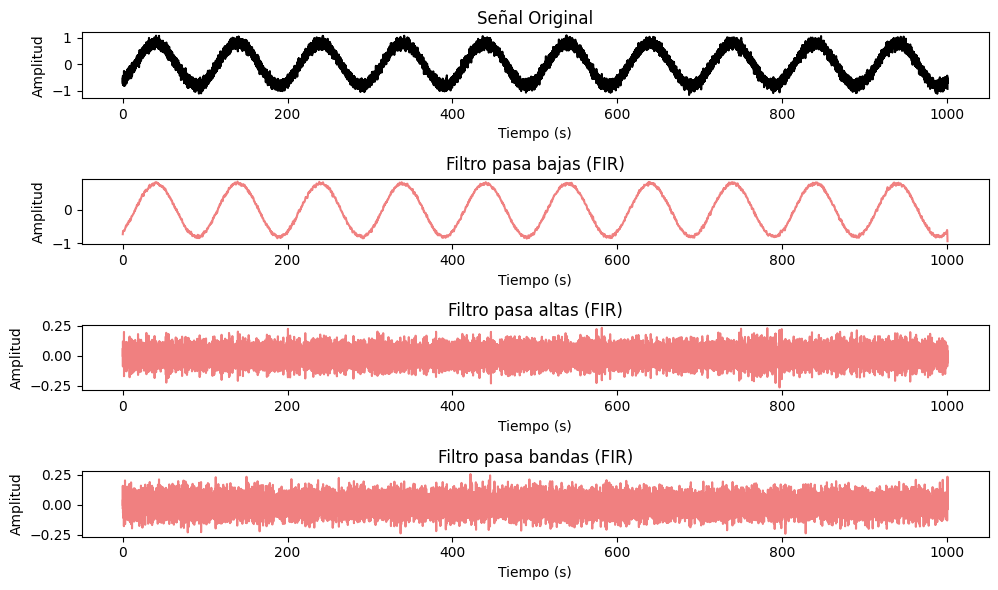

In [4]:
order_FIR = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn_l = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist
lowpass = signal.firwin(order_FIR+1,wn_l, pass_zero = 'lowpass',window='hamming') #filtro
y_f_30 = signal.filtfilt(b=lowpass,a=1,x=Ye) # aplicación del filtro

wn_h = 7.5/nyquist #frecuencia de corte normalizada respecto nyquist
highpass = signal.firwin(order_FIR+1,wn_h, pass_zero = 'highpass',window='hamming') #filtro
y_f_30_highpass = signal.filtfilt(b=highpass,a=1,x=Ye) # aplicación del filtro

bandpass = signal.firwin(order_FIR+1,[wn_l,wn_h], pass_zero = 'bandpass',window='hamming') #filtro
y_f_30_bandpass = signal.filtfilt(b=bandpass,a=1,x=Ye) # aplicación del filtro


plt.figure(figsize=(10, 6))

plt.subplot(4, 1, 1)
plt.plot(n, Ye, label='Señal Original', color='black')
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 2)
plt.plot(n,y_f_30, color="lightcoral")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa bajas (FIR)")

plt.subplot(4, 1, 3)
plt.plot(n,y_f_30_highpass, color="lightcoral")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa altas (FIR)")

plt.subplot(4, 1, 4)
plt.plot(n,y_f_30_bandpass, color="lightcoral")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa bandas (FIR)")

plt.tight_layout()
plt.show()


### **Diseño del filtro IIR**

**Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores**

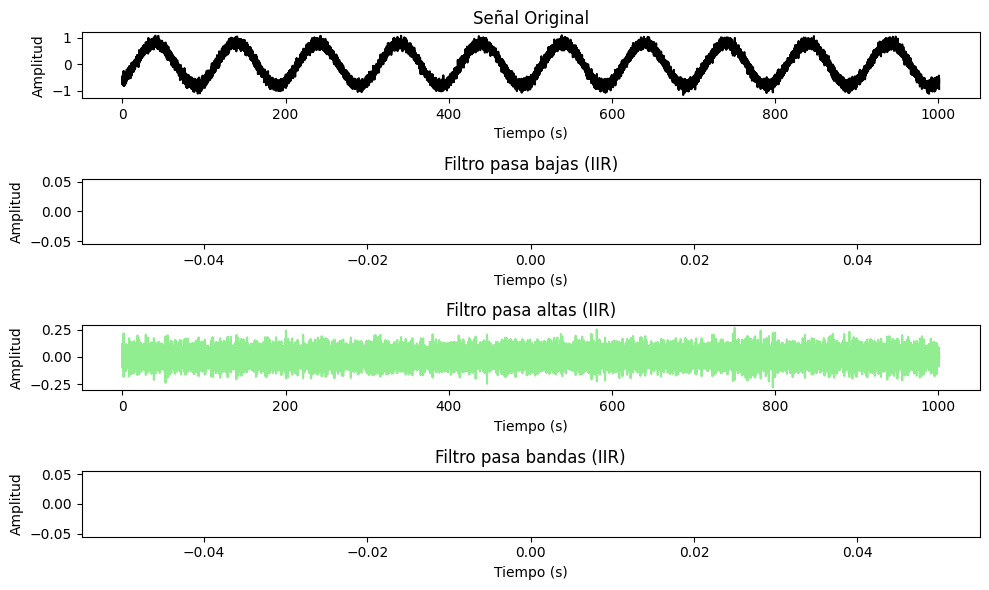

In [5]:
order_IIR = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn_l = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist
b_low, a_low = signal.iirfilter(order_IIR, wn_l, btype='low', analog=False, ftype='butter')
y_low_IIR = signal.filtfilt(b_low, a_low, Ye)
b_high, a_high= signal.iirfilter(order_IIR, wn_h, btype='high', analog=False, ftype='butter')
y_high_IIR = signal.filtfilt(b_high, a_high, Ye)
b_band, a_band= signal.iirfilter(order_IIR, [wn_l,wn_h], btype='band', analog=False, ftype='butter')
y_band_IIR = signal.filtfilt(b_band, a_band, Ye)

plt.figure(figsize=(10, 6))

plt.subplot(4, 1, 1)
plt.plot(n, Ye, label='Señal Original', color='black')
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 2)
plt.plot(n,y_low_IIR, color="lightgreen")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa bajas (IIR)")

plt.subplot(4, 1, 3)
plt.plot(n,y_high_IIR, color="lightgreen")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa altas (IIR)")

plt.subplot(4, 1, 4)
plt.plot(n,y_band_IIR,  color="lightgreen")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa bandas (IIR)")

plt.tight_layout()
plt.show()


Al utilizar las mismas condiciones del punto anterior, se evidencia que los filtros IIR no requieren de un orden tan alto, dado que como se mostró anteriormente, el filtrado pasa bajas y pasa bandas no mostró ningún resultado. Según lo anterior, se decidió probar con un valor de orden menor

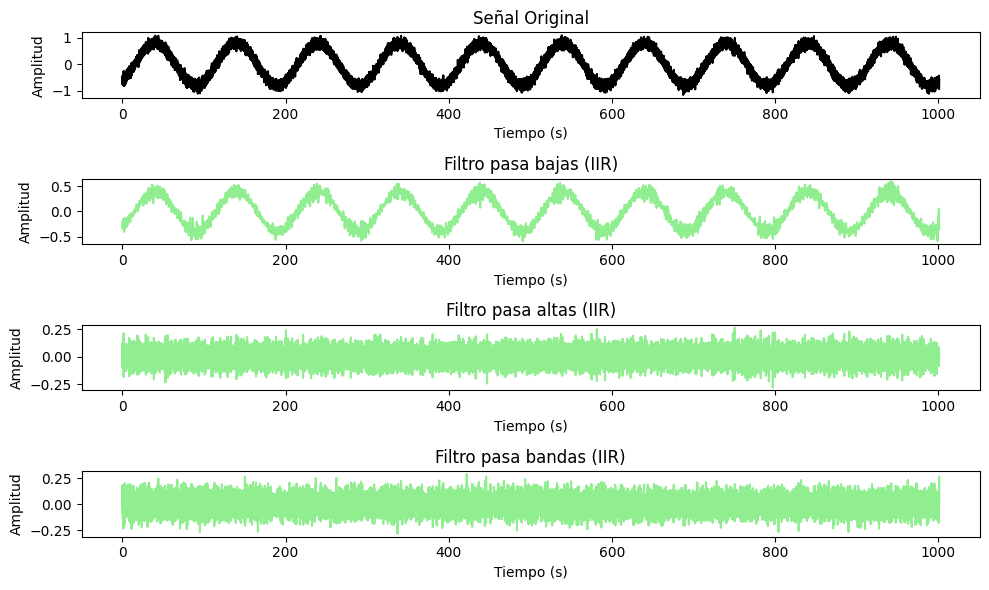

In [7]:
order_IIR = 20 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn_l = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist
b_low, a_low = signal.iirfilter(order_IIR, wn_l, btype='low', analog=False, ftype='butter')
y_low_IIR = signal.filtfilt(b_low, a_low, Ye)
b_high, a_high= signal.iirfilter(order_IIR, wn_h, btype='high', analog=False, ftype='butter')
y_high_IIR = signal.filtfilt(b_high, a_high, Ye)
b_band, a_band= signal.iirfilter(order_IIR, [wn_l,wn_h], btype='band', analog=False, ftype='butter')
y_band_IIR = signal.filtfilt(b_band, a_band, Ye)

plt.figure(figsize=(10, 6))

plt.subplot(4, 1, 1)
plt.plot(n, Ye, label='Señal Original', color='black')
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 2)
plt.plot(n,y_low_IIR, color="lightgreen")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa bajas (IIR)")

plt.subplot(4, 1, 3)
plt.plot(n,y_high_IIR, color="lightgreen")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa altas (IIR)")

plt.subplot(4, 1, 4)
plt.plot(n,y_band_IIR,  color="lightgreen")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa bandas (IIR)")

plt.tight_layout()
plt.show()

Después de probar con varios valores de ordenes, se evidenció que al utilizar un orden de 21, se evidenciaba un suceso parecido con un orden de 60, por lo que se decició utilizar un orden de 20.

Porteriormente, debido a que no es evidencian muchas diferencias en el orden del tiempo para los dos tipos de filtros digitales implementados, se decidió graficar en el dominio de la frecuencia (bode) con el fin de reconocer las diferencias entre cada filtro.

**Función para obtener el diagrama de bode de los filtros**

Esta función, dada por la docente, muestra el diagrama de bode del filtro, ingresando el numerador y el denominador de la función de transferencia.

In [8]:
def mfreqz(b,a,order,nyq_rate = 1):

    """
    Plot the impulse response of the filter in the frequency domain

    Parameters:

        b: numerator values of the transfer function (coefficients of the filter)
        a: denominator values of the transfer function (coefficients of the filter)

        order: order of the filter

        nyq_rate = nyquist frequency
    """

    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));

    plt.figure(figsize=(20,3));
    plt.subplot(131);
    plt.plot((w/max(w))*nyq_rate,abs(h));
    plt.ylabel('Magnitude');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    [xmin, xmax, ymin, ymax] = plt.axis();
    plt.grid(True);

    plt.subplot(132);
    plt.plot((w/max(w))*nyq_rate,h_dB);
    plt.ylabel('Magnitude (db)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    plt.grid(True)
    plt.grid(True)


    plt.subplot(133);
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase);
    plt.ylabel('Phase (radians)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Phase response. Order: ' + str(order));
    plt.subplots_adjust(hspace=0.5);
    plt.grid(True)
    plt.show()

#### **Diagramas de bode**

**Pasa bajas**

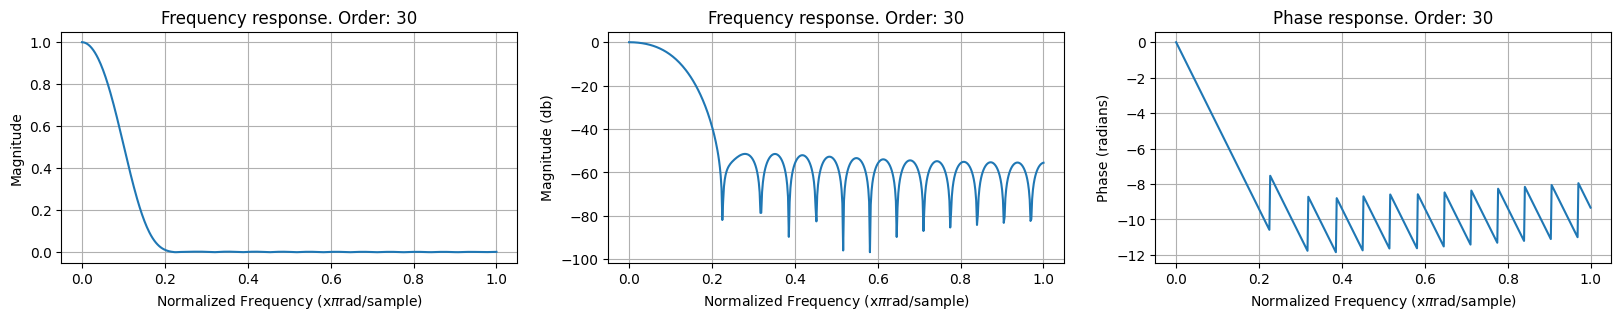

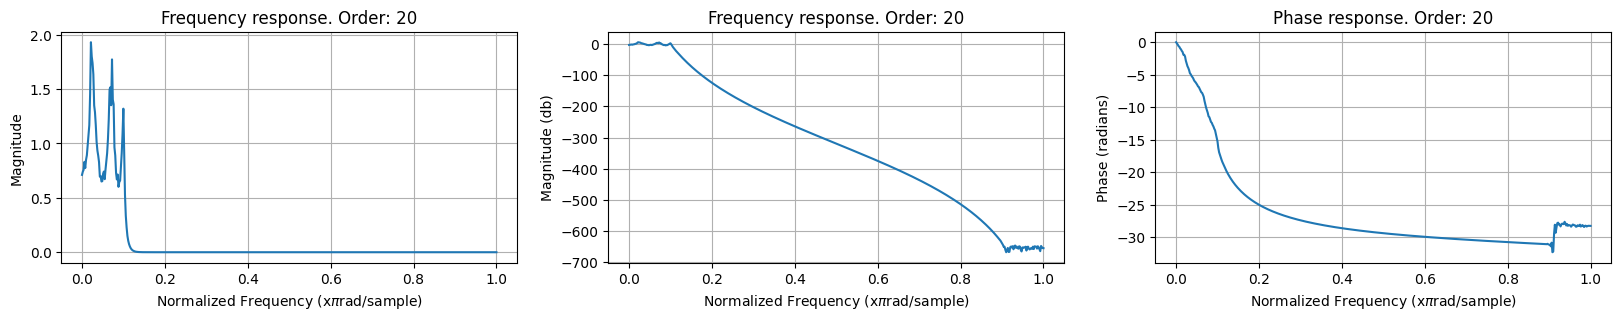

In [ ]:
# FIR
mfreqz(lowpass, 1, 30)
# IIR
mfreqz(b_low, a_low, 20)

**Pasa altas**

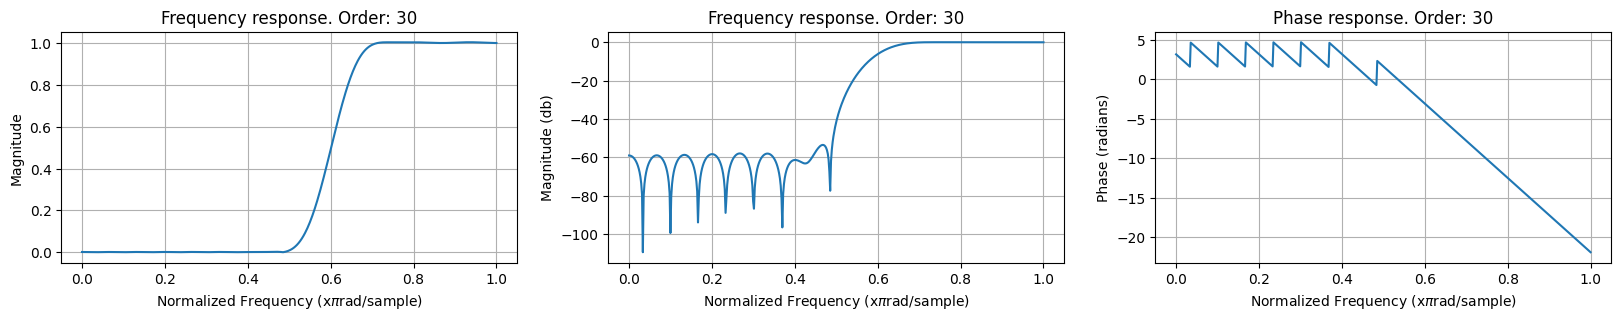

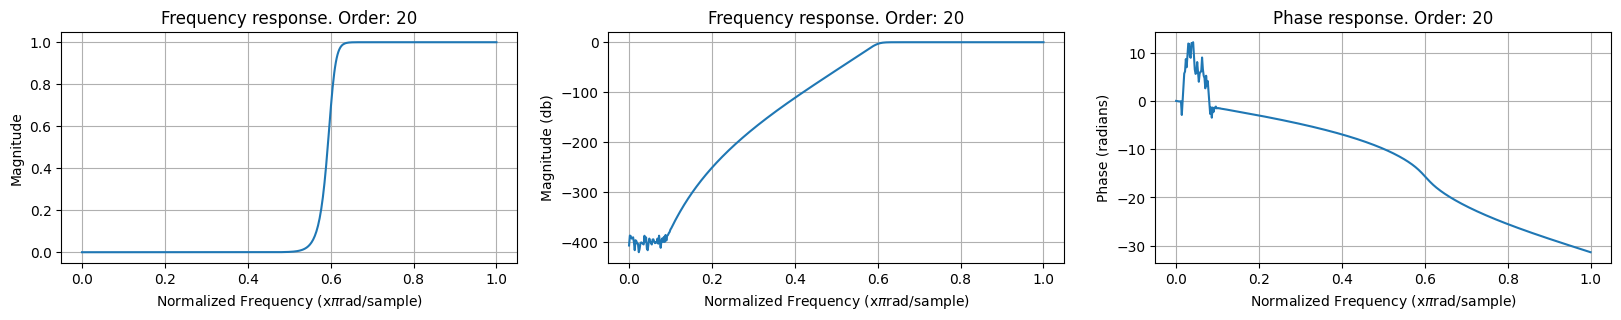

In [ ]:
# FIR
mfreqz(highpass, 1, 30)

# IIR
mfreqz(b_high, a_high, 20)

**Pasa bandas**

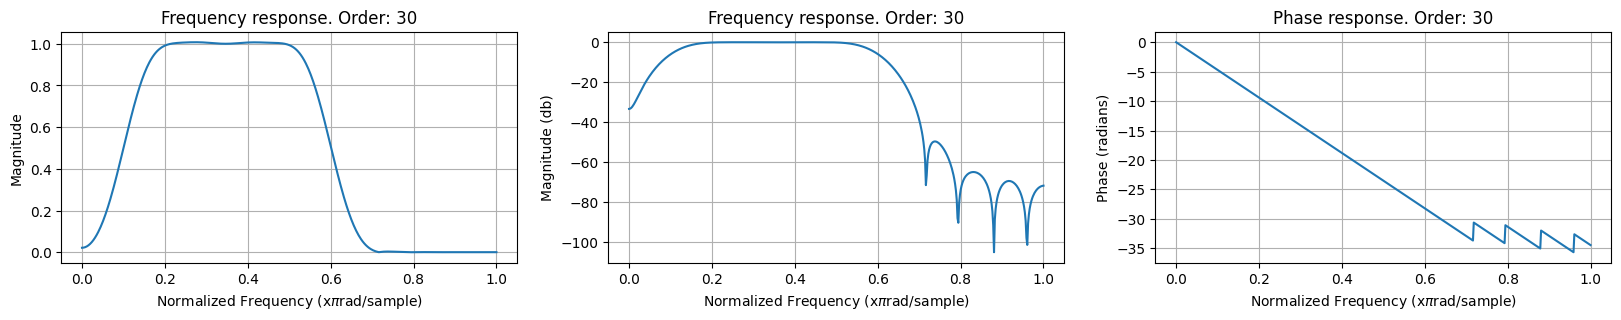

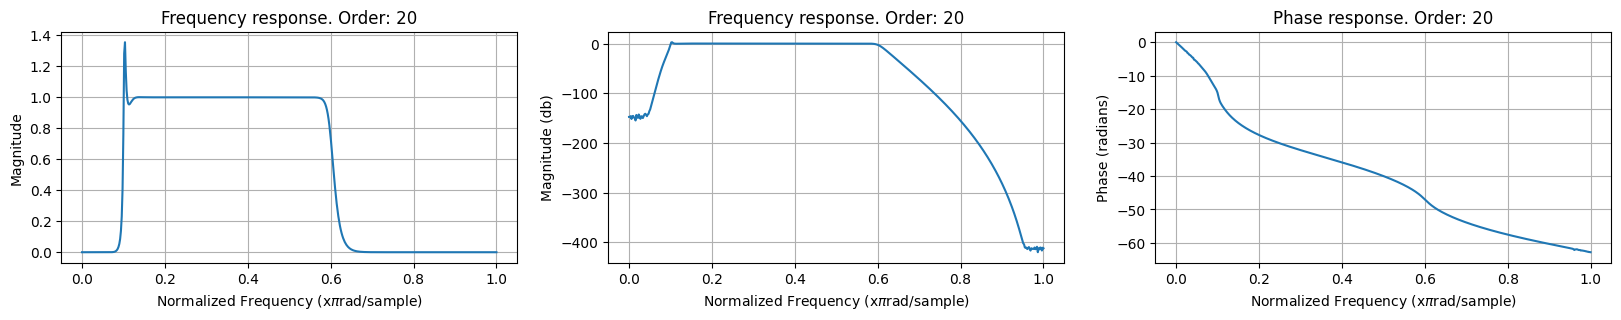

In [ ]:
# FIR
mfreqz(bandpass, 1, 30)
# IIR
mfreqz(b_band, a_band, 20)

**Comparación entre los filtros FIR y los IIR:** según lo evidenciado en los diagramas de bode presentados anteriormente, es posible identificar una mayor estabilidad en fase en los filtros FIR, dado que se evidencia una fase más lineal.

También, respecto a los filtros FIR, los filtros IIR, aunque presentan picos de resonancia que inestabilizan la fase y la magnitud en la banda de paso, los filtros FIR presentan mayores oscilaciones en la banda de rechazo, además de que requieren de un orden mayor.

Por otro lado, los filtros FIR tienen una transición entre la banda de paso y la banda de rechazo menos abrupta que en los filtros IIR, por lo que es probable que en los filtros FIR se tengan un ancho de banda mayor.


## **4.3 Filtrado**

### **Filtro FIR**

**Pruebe los comandos lfilter y filtfilt utilizando la información entregada por el filtro pasa bajas FIR implementado anteriormente y la señal Ye(n)**


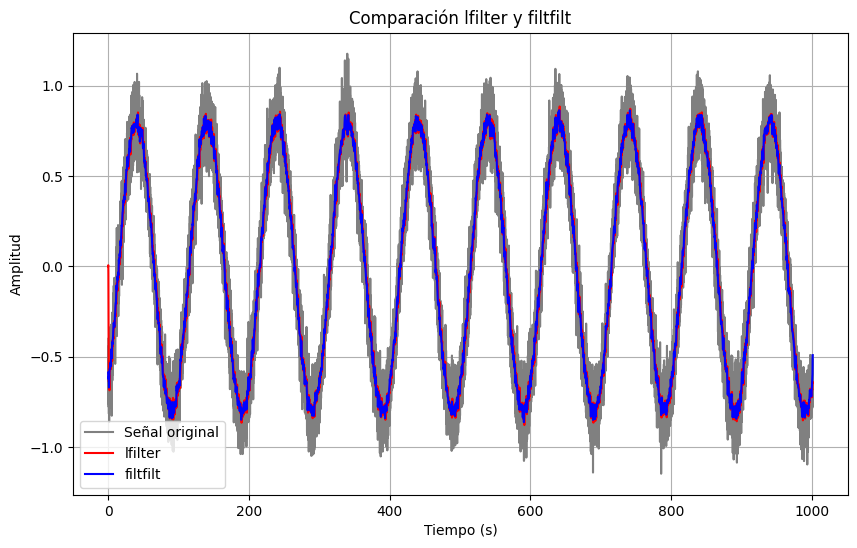

In [ ]:
# Filtrado con el filtro pasa bajas FIR utilizando lfilter
y_fir_lfilter = signal.lfilter(lowpass, 1, Ye)

# Filtrado con el filtro pasa bajas FIR utilizando filtfilt
y_fir_filtfilt = signal.filtfilt(lowpass, 1, Ye)
plt.figure(figsize=(10, 6))
plt.plot(n, Ye, label='Señal original', color="gray")  # Señal original
plt.plot(n, y_fir_lfilter, label='lfilter', color="red")  # Señal filtrada con lfilter
plt.plot(n, y_fir_filtfilt, label='filtfilt', color="blue")  # Señal filtrada con filtfilt
plt.title('Comparación lfilter y filtfilt')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

**¿Por qué se utiliza sólo el  numerador?**

En los filtros FIR, la salida depende únicamente de los valores de entrada actuales y pasados, ponderados por los coeficientes del filtro. Estos coeficientes corresponden al numerador de la función de transferencia del filtro. El denominador, que representa la retroalimentación, es igual a 1 en los filtros FIR, ya que no hay retroalimentación. Por este motivo, solo se necesita el numerador para realizar el filtrado [4].

**¿A qué hace referencia el numerador?**

El numerador hace referencia a la respuesta al impulso del filtro. Por lo que indica cómo el filtro responde a un impulso unitario en la entrada. Determinando, los coeficientes del numerador la forma y característcas del filtro, como la frecuencia de corte y la atenuación de este.

**¿Evidencia cambios en el uso  de las funciones de filtrado?**

Teóricamente, existen diferencias entre el uso de lfilter y filtfilt. lfilter puede introducir desfase en la señal de entrada al filtrar muestra por muestra en una sola dirección de barrido. Esto ocurre porque la salida en algún momento solo depende de las muestras de entradas anteriores, por lo que acumula un desfase que puede distorcionar la señal [1]. Contrario al filtfilt, el cual es aplicado en ambas direcciones, minimizando el desfase[2]. Sin embargo, este rasgo solo es vagamente visible en en el pico inicial, al observase una diferencia de amplitud, al analizarlo bajo una gráfica en el tiempo.

**¿Es adecuado el orden del filtro usado?**

Por la similitud entre la salidas de lfilter y filtfilt, mostrando que no hay desfase. Se puede afirmar que el orden del filtro es el adecuado analizado en tiempo. Sin embargo, determinar si el orden del filtro es el adecuado, dependerá de la aplicación de este. Más adelante se visualizará el comportamiento en frecuencia con respecto al orden en la selectividad y fase de cada filtro.

### **Filtro IIR**


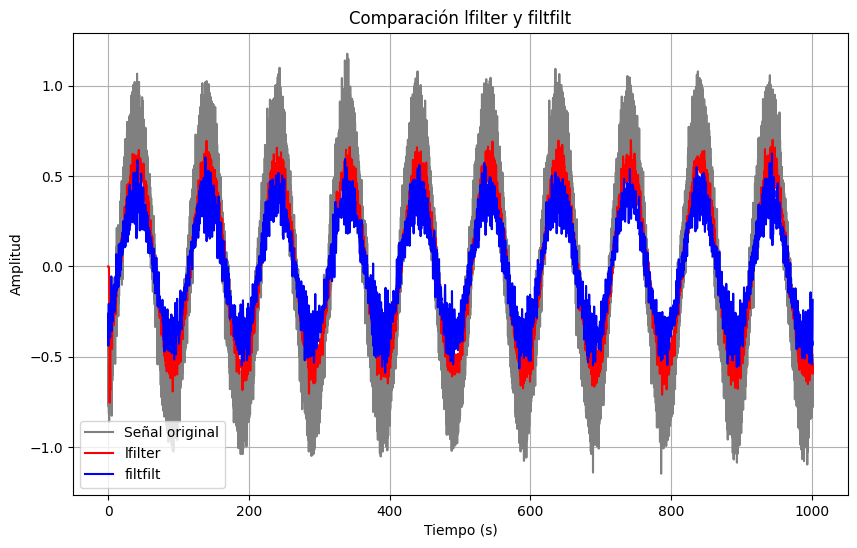

In [ ]:
# Filtrado con el filtro pasa bajas IIR utilizando lfilter
y_iir_lfilter = signal.lfilter(b_low, a_low, Ye)

# Filtrado con el filtro pasa bajas IIR utilizando filtfilt
y_iir_filtfilt = signal.filtfilt(b_low, a_low, Ye)

plt.figure(figsize=(10, 6))
plt.plot(n, Ye, label='Señal original', color="gray")  # Señal original
plt.plot(n, y_iir_lfilter, label='lfilter', color="red")  # Señal filtrada con lfilter
plt.plot(n, y_iir_filtfilt, label='filtfilt', color="blue")  # Señal filtrada con filtfilt
plt.title('Comparación lfilter y filtfilt')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

**¿Por qué se utiliza el
numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal
caso hágalo y analice.**

En los filtros IIR, el denominador se utiliza para implementar la retroalimentación. Esta retroalimentación permite una respuesta al impulso infinita, lo que da el filtro la capacidad de modelar frecuencias con menor cantidad de coeficientes en comparación con un filtro FIR[3].

Teóricamente, un mayor orden genera una mejor aproximación a la frecuencia de corte deseada y mayor atenuación, pero esto también puede aumentar el desfase y generar inestabilidad en la banda de paso y la banda de rechazo, por lo que vamos a modificar el orden del filtro, para visualizar su comportamiento.

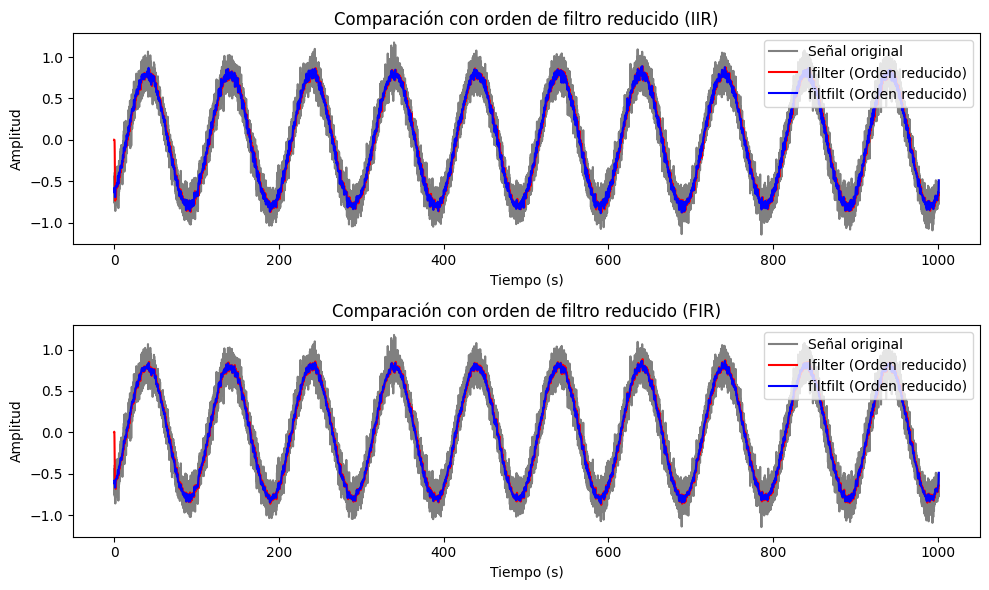

In [ ]:
b_low_new, a_low_new = signal.butter(order_IIR /2, wn_l, 'lowpass')

y_iir_lfilter_new = signal.lfilter(b_low_new, a_low_new, Ye)
y_iir_filtfilt_new = signal.filtfilt(b_low_new, a_low_new, Ye)

b_low_new2, a_low_new2 = signal.butter(order_FIR /2, wn_l, 'lowpass')

y_iir_lfilter_new2 = signal.lfilter(lowpass,1, Ye)
y_iir_filtfilt_new2 = signal.filtfilt(lowpass,1, Ye)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(n, Ye, label='Señal original',  color="gray")  # Señal original
plt.plot(n, y_iir_lfilter_new, label='lfilter (Orden reducido)',  color="red")
plt.plot(n, y_iir_filtfilt_new, label='filtfilt (Orden reducido)',  color="blue")
plt.title('Comparación con orden de filtro reducido (IIR)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(n, Ye, label='Señal original',  color="gray")  # Señal original
plt.plot(n, y_iir_lfilter_new2, label='lfilter (Orden reducido)',  color="red")
plt.plot(n, y_iir_filtfilt_new2, label='filtfilt (Orden reducido)',  color="blue")
plt.title('Comparación con orden de filtro reducido (FIR)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.tight_layout()
plt.show()


A pesar de la diferencia de sus órdenes, ambos filtros producen resultados muy similares **en el dominio del tiempo**. Por lo que la reducción del orden en el IIR no parece haber comprometido su rendimiento en comparación con el FIR. Sin embargo, esto solo es lo evidenciado en el dominio del tiempo. La frecuencia de corte parece ser apropiada para ambos casos, permitiendo un fitrado efectivo. Según lo anterior se evaluará en el dominio de la frecuencia qué tanto afecta el cambio en el orden del filtro.

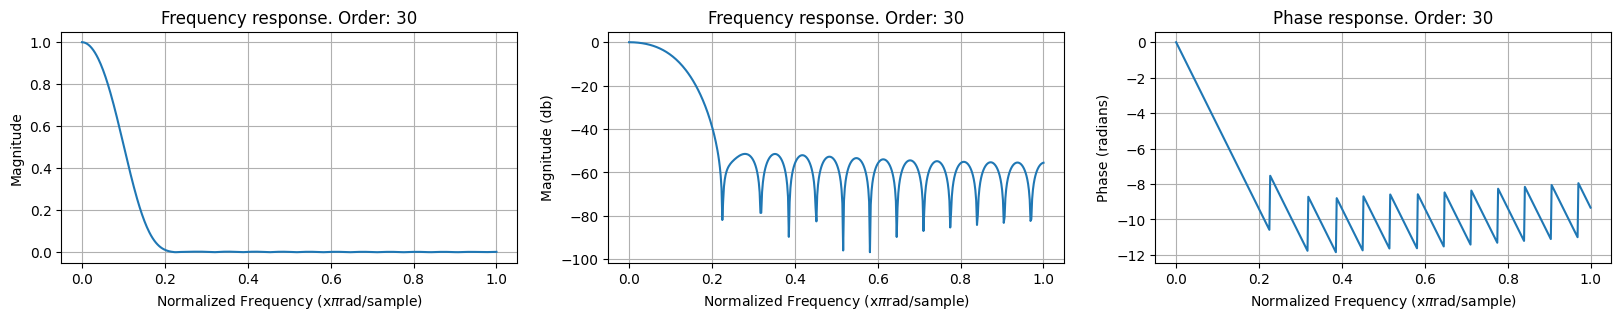

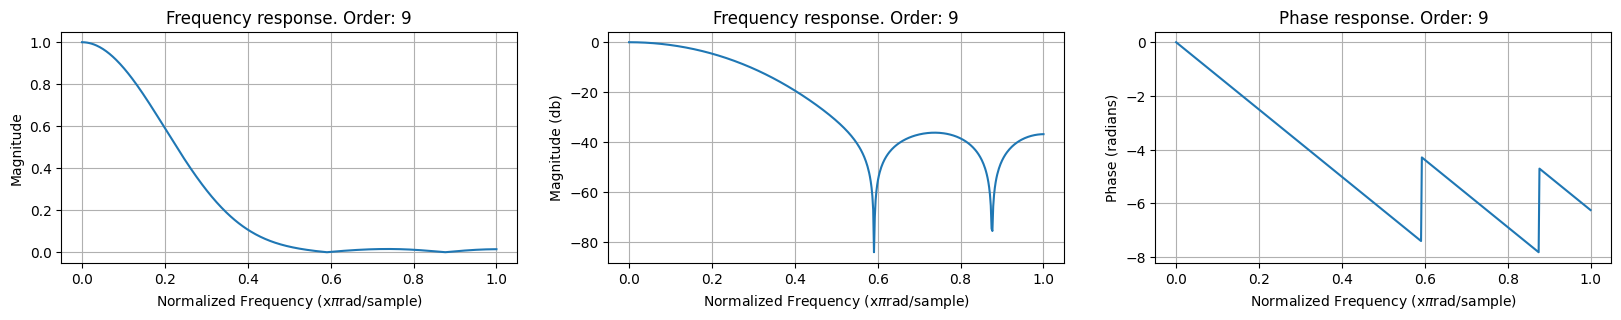

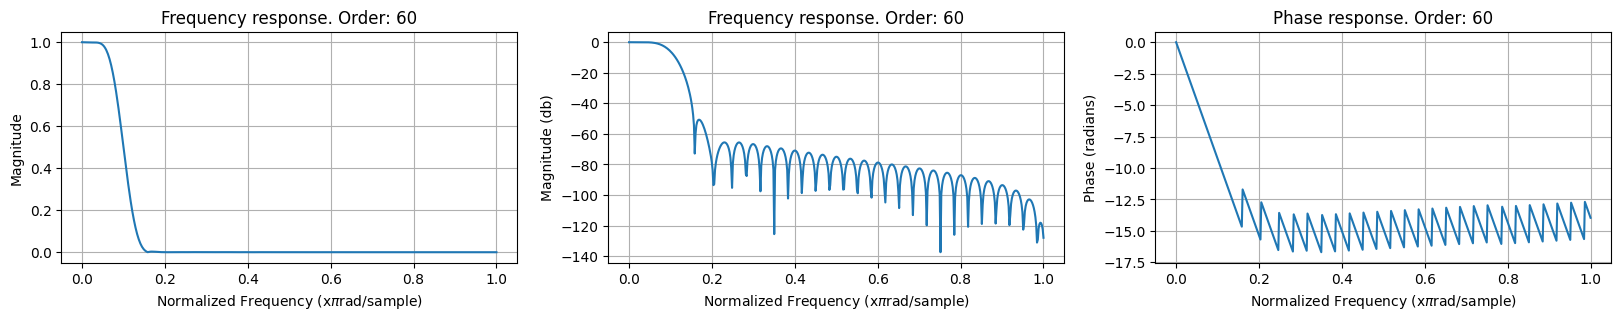

In [ ]:
# Filtro FIR pasa bajas con un orden de 9
lowpass_2 = signal.firwin(9, wn_l, pass_zero = 'lowpass',window='hamming') #filtro
# Filtro FIR pasa bajas con un orden de 60
lowpass_3 = signal.firwin(60, wn_l, pass_zero = 'lowpass',window='hamming') #filtro

mfreqz(lowpass, 1, 30)
mfreqz(lowpass_2, 1, 9)
mfreqz(lowpass_3, 1, 60)

Según lo evidenciado en los gráficos de bode anteriores, la atenuación del filtro mejoró cuando se implementó el filtro con un orden de 60, por lo que al aumentar el orden, se puede decir que en los filtros FIR se aumenta la selectividad. En contraste, al utilizar un orden de 9 la atenuación fué más lenta, por lo que la selectividad disminuyó

Respecto al comportamiento en fase, se evidenciaron menos oscilaciones al implementar un filtro de orden 9 y a medida que el orden aumentaba, se evidenció un mayor número de oscilaciones.

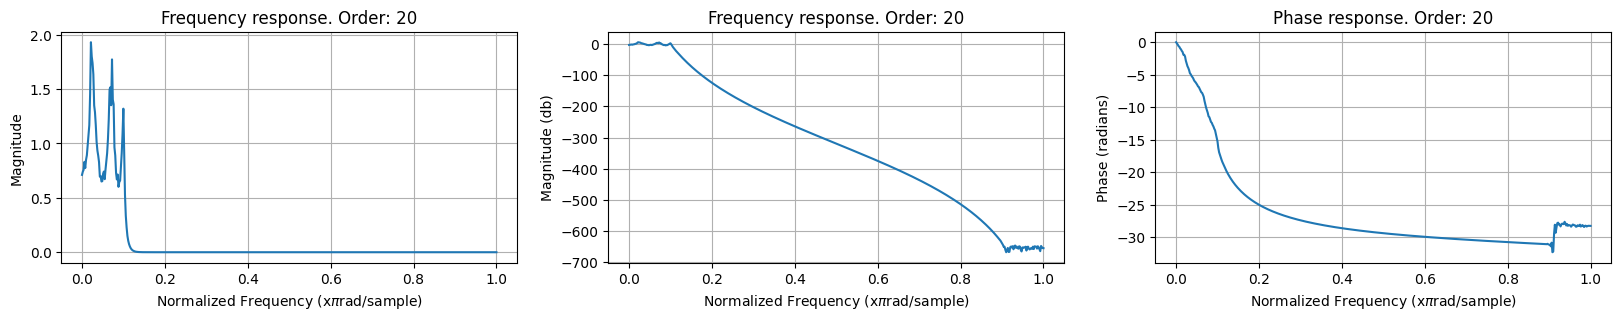

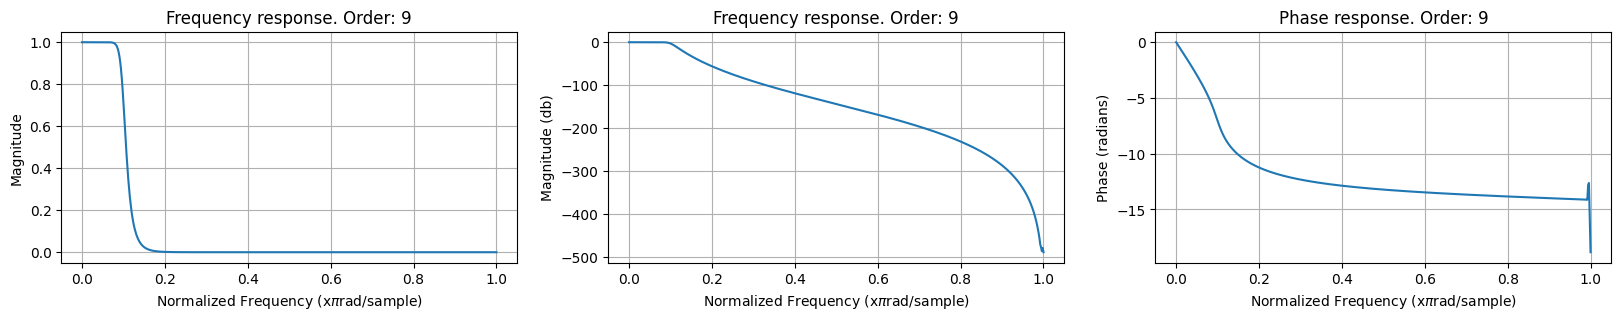

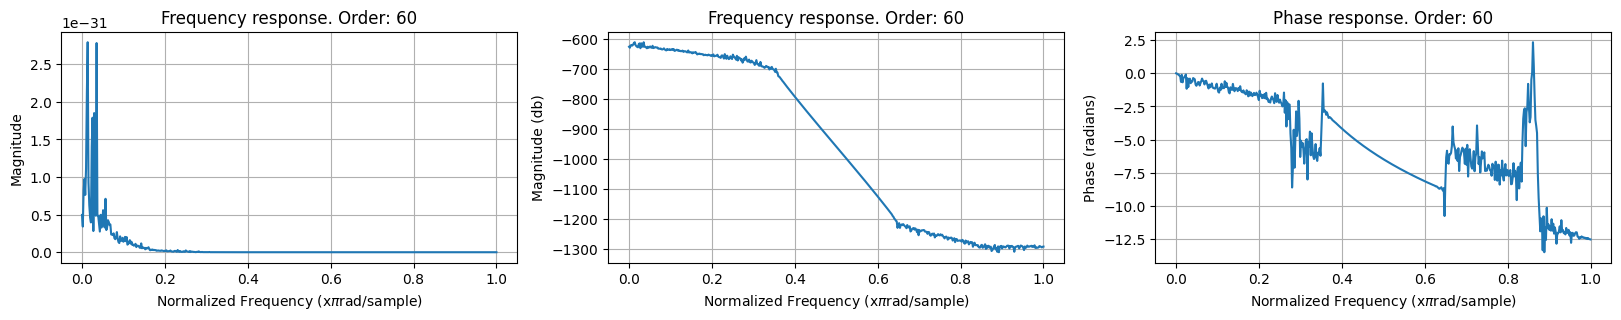

In [ ]:
mfreqz(b_low, a_low, 20) #IIR
b_low_2, a_low_2 = signal.iirfilter(9, wn_l, btype='low', analog=False, ftype='butter')
b_low_3, a_low_3 = signal.iirfilter(60, wn_l, btype='low', analog=False, ftype='butter')
mfreqz(b_low_2, a_low_2, 9) #IIR
mfreqz(b_low_3, a_low_3, 60) #IIR

Para los fltros IIR, según lo evidenciado en los diagramas de bode anteriores, al disminuir el orden se disminuye la atenuación del filtro, por lo que se hace menos selectivo. Por otro lado, en el filtro de orden 9 no se evidenciaron picos de resonancia u oscilaciones en la banda pasante, sin embargo, en los filtros de mayor orden (20 y 60) si se presentó este fenómeno y se evidenció una mayor atenuación.

Respecto al comportamiento en frecuencia sucede algo parecido a lo determinado anteriormente, ya que a medida que se aumenta el orden, se evidencia una disminución de la estabilidad en términos de fase.

## **4.4. Aplicación**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
signal = np.loadtxt('/content/drive/MyDrive/Bioseñales/Laboratorio Bioseñales/Prácticas /Práctica 6/senal_filtros.txt')
# Extraer el canal 1 de la señal
signal_canal_1 = signal[:, 0]
# Frecuencia de muestreo de la señal
fs = 500
print(len(signal_canal_1))

60000


**1. Realice un análisis frecuencial con la función que permite calcular el periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? Analice.**



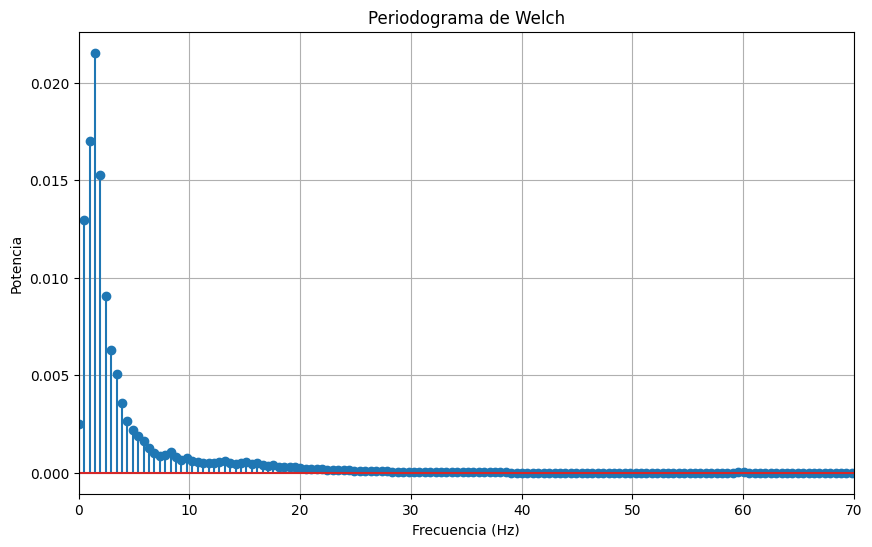

In [ ]:
nperseg = 1024 # Ancho de la ventana, nperseg no debe ser mayor que la longitud de la señal
noverlap = int(nperseg / 2)  # Solapamiento de las ventanas del 50%
ventana = np.hanning(nperseg)  # Ventana Hanning
# Calcular el periodograma de Welch
f, power = welch(signal_canal_1, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)

# Se grafica frecuencia vs potencia
plt.figure(figsize=(10, 6))
plt.stem(f, power)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Periodograma de Welch')
plt.grid(True)
plt.xlim(0, 70)
plt.show()

Respecto a lo anterior, se evidencia presencia de ruido eléctrico, 50 Hz y 60Hz con una potencia muy baja, por lo que solo se ve como un resalto en la gráfica anterior, por lo que, se limitará aún más la gráfica para poder evidenciarlo mejor.

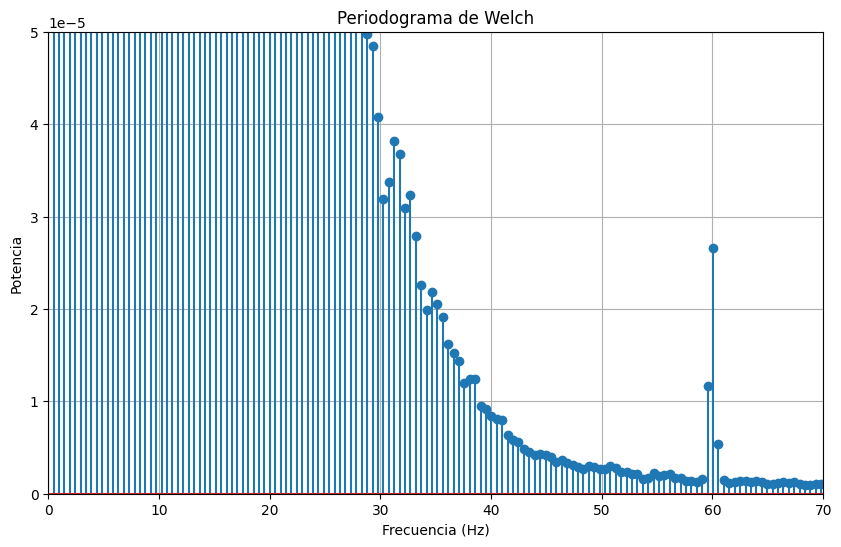

In [ ]:
nperseg = 1024 # Ancho de la ventana, nperseg no debe ser mayor que la longitud de la señal
noverlap = int(nperseg / 2)  # Solapamiento de las ventanas del 50%
ventana = np.hanning(nperseg)  # Ventana Hanning
# Calcular el periodograma de Welch
f, power = welch(signal_canal_1, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)

# Se grafica frecuencia vs potencia
plt.figure(figsize=(10, 6))
plt.stem(f, power)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Periodograma de Welch')
plt.grid(True)
plt.xlim(0, 70)
plt.ylim(0,0.00005)
plt.show()

Según lo anterior, se evidencia un pequeño pico en la frecuencia de 60Hz con una baja potencia.

**2. Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la señal filtrada) ¿Hay cambios? Analice.**


**Filtro FIR rechazabandas de frecuencia de 60Hz**

In [ ]:
Fs = 500
order_notch = 200
nyquist = Fs/2
wn_notch_low = 57/nyquist
wn_notch_high = 63/nyquist
notch = signal.firwin(order_notch+1, [wn_notch_low, wn_notch_high], pass_zero='bandstop', window='hamming')
notch_FIR = signal.lfilter(b=notch, a=1, x=signal_canal_1)

En este caso, de utilizó un rango de frecuencias a filtrar entre 57Hz y 63Hz. Para elegir el rango anterior mencionado se realizó una serie de ensayos en donde se determinó que para poder filtrar por completo las frecuencias de ruido eléctrico, era necesario definir el rango mencionado.

Lo anterior también se aplicó con el orden del filtro, el cual, cuado el orden era muy pequeño, solo se evidenciaba una pequeña reducción de la potencia en la señal a filtrar, por lo que se fué aumentando hasta que con un orden de 200 y el rango de frecuencias definido, se pudo filtrar el ruido evidenciado.

**Comportamiento en frecuencia de la señal filtrada (Periodograma de Welch)**

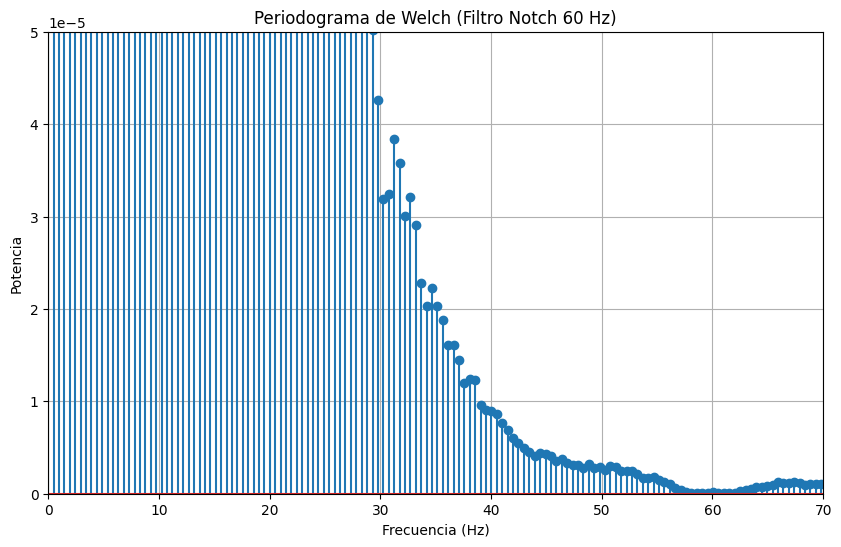

In [ ]:
nperseg = 1024 # Ancho de la ventana, nperseg no debe ser mayor que la longitud de la señal
noverlap = int(nperseg / 2)  # Solapamiento de las ventanas del 50%
ventana = np.hanning(nperseg)  # Ventana Hanning
# Calcular el periodograma de Welch
f_notch, power_notch = welch(notch_FIR, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)

# Se grafica frecuencia vs potencia
plt.figure(figsize=(10, 6))
plt.stem(f_notch, power_notch)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Periodograma de Welch (Filtro Notch 60 Hz)')
plt.grid(True)
plt.xlim(0, 70)
plt.ylim(0,0.00005)
plt.show()

Posterior al filtrado, se evidenció una reducción significativa en la potencia en el rango de frecuencias en el que se aplicó el filtro rechaza banda (57 Hz y 63 Hz). Lo anterior, determina la capacidad del filtro para eliminar el ruido eléctrico y de su selectividad, dado que solo se evidencia una reducción en potencia en el rango mencionado pero fuera de ese rango, no se generaron cambios en la señal.

**3. Grafique un segmento de las señales antes y después de filtrar, analice los cambios**

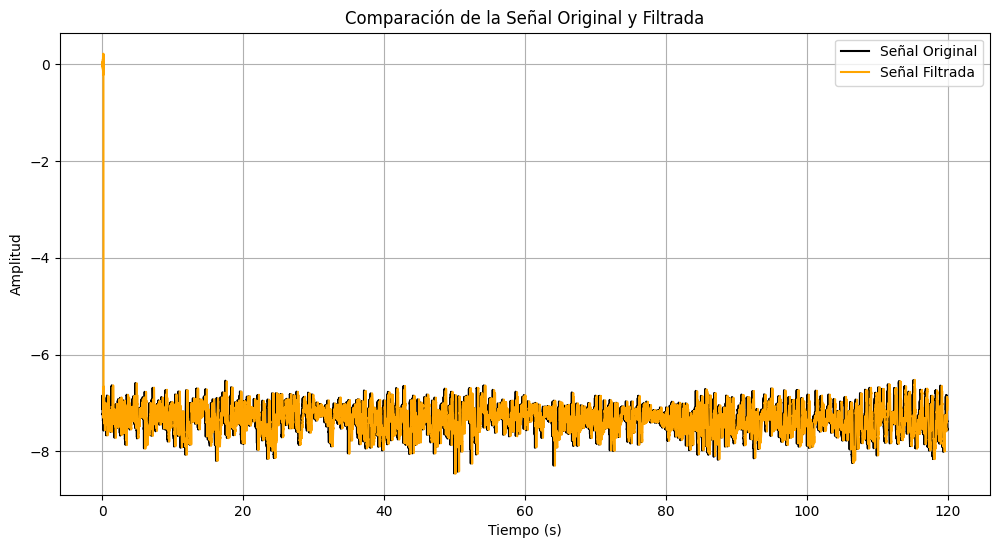

In [ ]:
# Definir el tiempo para el segmento de señales a graficar
tiempo = np.arange(0, len(signal_canal_1) / fs, 1 / fs)

# Graficar un segmento de las señales antes y después de filtrar
plt.figure(figsize=(12, 6))
plt.plot(tiempo, signal_canal_1, label='Señal Original', color='black')
plt.plot(tiempo, notch_FIR, label='Señal Filtrada', color='orange')
plt.title('Comparación de la Señal Original y Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

Según lo evidenciado anteriormente, puede decirse que entre la señal original y la filtrada no se evidencian muchas diferencias, en especial, en términos de amplitud Sin embargo, es notable un desfase entre la señal filtrada y la señal original, el cual se presenta debido al orden elegido, ya que, entre mayor sea el valor de "n", mayor selectividad del filtro pero produce un mayor desfase [5].

## **Conclusiones**





*   La implementación de filtros FIR e IIR ha permitido observar sus diferencias estructurales y funcionales, donde el filtro FIR destacó por su simplicidad al requerir únicamente el numerador en su implementación, mientras que el filtro IIR demostró la importancia de la retroalimentación al utilizar tanto numerador como denominador en su estructura.

*  También se puede concluir que los fitros IIR son más inestables y son capaces de distrosionar la fase aún más que los filtros FIR. Así mismo, los filtros IIR requieren un orden menor y a medida que aumenta el orden en este tipo de filtros digitales, ocurre un mayor número de oscilaciones en la banda pasante.

*  Finalmente, se concluye que a medidia que aumenta el orden de un filtro digital (en especial en los filtros FIR, según lo evidenciado) se evidencia una mayor selectividad del filtro pero un mayor desfase en la señal filtrada respecto a la original







## **Referencias**

[1]: «lfilter — SciPy v1.14.1 Manual». https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

[2]: «filtfilt — SciPy v1.14.1 Manual». https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html

[3]: «iirfilter — SciPy v1.14.1 Manual». https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirfilter.html

[4]: «firwin — SciPy v1.14.1 Manual». https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html

[5]: Notas de clase.